This notebook focuses on analysing the Seattle AirBnB dataset available from [Kaggle](https://www.kaggle.com/airbnb/seattle/data). This notebook was done as a project for the Data Scientist Nanodegree program on Udacity.

# Package import ad paths setup

!pip install missingno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import missingno

In [2]:
%matplotlib inline

In [3]:
DATA_FOLDER = Path('../data')

In [4]:
!ls $DATA_FOLDER

calendar.csv  listings.csv  reviews.csv


In [5]:
calendar = pd.read_csv(DATA_FOLDER / 'calendar.csv')
listings = pd.read_csv(DATA_FOLDER / 'listings.csv')
reviews = pd.read_csv(DATA_FOLDER / 'reviews.csv')

# Data quality

In this first section we will look into the quality of the data. Specifically we will look at missing values in the data. I like to use the package [missingno](https://github.com/ResidentMario/missingno), which gives a good overview of columns and where there are missing values.

## Calendar data

In [6]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


From the info above, we have some columns that need cleaning and type conversion. The date column needs to be converted to a datetime type and the price column needs to be cleaned and converted into a float type.

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


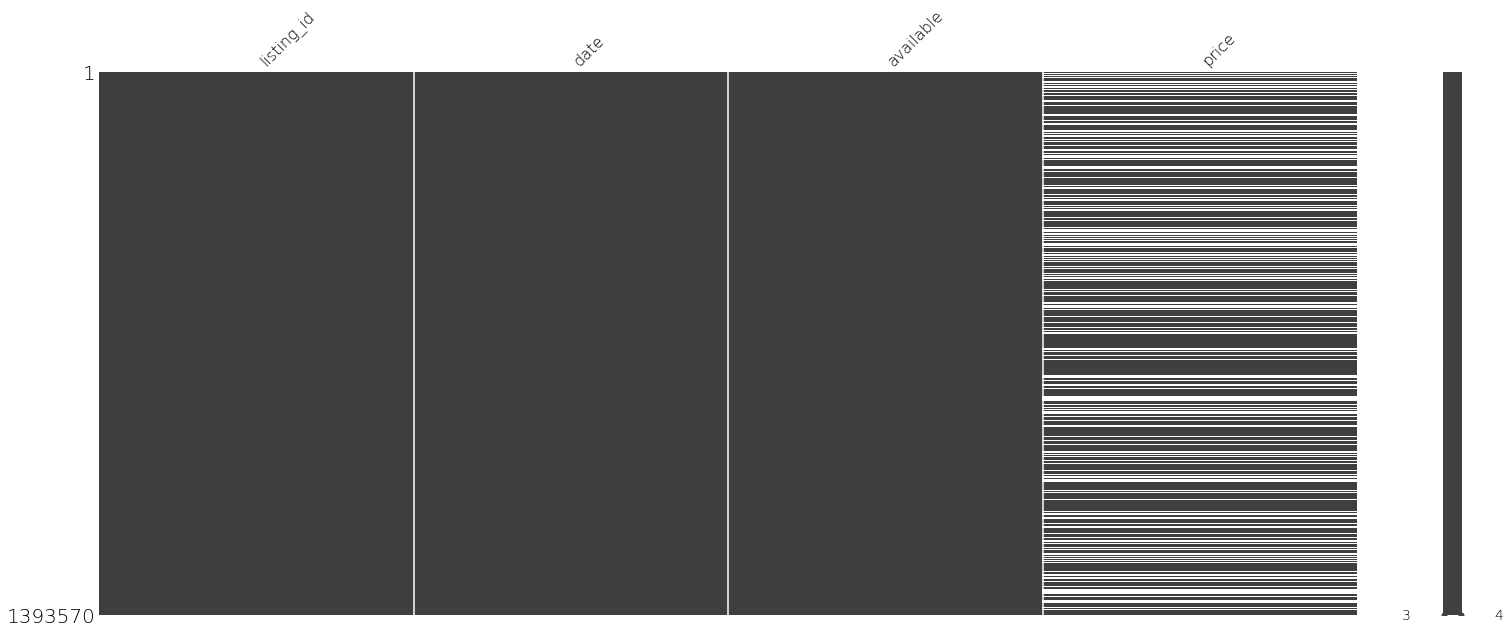

In [8]:
missingno.matrix(calendar);

This data shows what prices listings have had at a given time. Also it shows if the listing has been rented out or not.

Apparent from above is that the price column often has null values. Seing as the data lists prices and availability given a certain date, it is possible that this is a natural thing, since listings will be shown without prices, whenever they are rented out to visitors. We can investigate this by filtering all rows where `available == 'f'` and counting number of unique values

In [9]:
calendar[calendar['available'] == 'f']['price'].value_counts()

Series([], Name: price, dtype: int64)

Indeed for all rows where the listing is not available, price will be a NaN. We can also investigate if there are any rows with available listings where the price is NaN

In [10]:
calendar_nans = calendar[calendar.isna().any(axis=1)]

In [11]:
len(calendar_nans[calendar_nans['available'] == 't'])

0

This shows that the data is clean and we have a price for every row where a listing is available.

### Cleaning

In [12]:
# Converting the date to a pandas datetime type
calendar['date'] = pd.to_datetime(calendar['date'])

In [13]:
# Converting price to a float value
calendar['cleaned_price'] = calendar['price'].str.replace('[$,]','').astype('float')

## Listings data

In [14]:
# Allow printing of more rows, so we can see content of all columns in listings dataframe.
pd.options.display.max_rows = len(listings.columns)

In [15]:
listings.sample(10).T

,666,1116,1772,295,3196,1615,3316,1671,1432,1376
id,7364024,10272763,3818746,340706,8690491,7388225,107962,8341720,7440415,8829472
listing_url,https://www.airbnb.com/rooms/7364024,https://www.airbnb.com/rooms/10272763,https://www.airbnb.com/rooms/3818746,https://www.airbnb.com/rooms/340706,https://www.airbnb.com/rooms/8690491,https://www.airbnb.com/rooms/7388225,https://www.airbnb.com/rooms/107962,https://www.airbnb.com/rooms/8341720,https://www.airbnb.com/rooms/7440415,https://www.airbnb.com/rooms/8829472
scrape_id,20160104002432,20160104002432,20160104002432,20160104002432,20160104002432,20160104002432,20160104002432,20160104002432,20160104002432,20160104002432
last_scraped,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04,2016-01-04
name,Madison Valley Triplex,Eastlake Townhome (Private BR+BA),Alki Beach View Home,Charming Wallingford Apartment,Homey studio with a sunset view,Luxury Apartment in Capitol Hill,Haller Lake Restored Log Cabin,Cozy Bedroom @ Capitol Hill,1BR 2 Blocks frm Pike Market & Pool,Belltown Condos 1BD
summary,Quiet residence just 15 min to anywhere in Sea...,Private top floor master bedroom in 1999-built...,"Perched two blocks above Alki Beach, this stun...","Spacious, well-lit mother-in-law apartment loc...",Big sunny windows with nothing blocking the vi...,Beautiful modern apartment in Seattle's trendi...,You will notice there's no availability late O...,Our furnished apartment and bedroom located be...,Make yourself at home in a large one bedroom a...,*Clear View of New Year's Eve Space Needle Fir...
space,The listing I offer is also my own home. By...,This is a cozy 1999 townhouse on a quiet side ...,Great Room Layout: The main living space is li...,"The rental is a spacious, well-lit mother-in-l...","Homey, cozy but not tiny, huge windows overloo...",NaN,Sweet restored stockade style log cabin right ...,We are located between First Hill/Capitol Hill...,I am offering my private apartment in a great ...,NaN
description,Quiet residence just 15 min to anywhere in Sea...,Private top floor master bedroom in 1999-built...,"Perched two blocks above Alki Beach, this stun...","Spacious, well-lit mother-in-law apartment loc...",Big sunny windows with nothing blocking the vi...,Beautiful modern apartment in Seattle's trendi...,You will notice there's no availability late O...,Our furnished apartment and bedroom located be...,Make yourself at home in a large one bedroom a...,*Clear View of New Year's Eve Space Needle Fir...
experiences_offered,none,none,none,none,none,none,none,none,none,none
neighborhood_overview,Restaurants and shops in the neighborhood: 34...,Eastlake is perfectly situation between Downto...,NaN,The house is located in the middle of the char...,Lower Queen Anne has several bars and restaura...,NaN,NaN,"We located at the Seattle University area, so ...",NaN,NaN


In [16]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

A few columns need to be cleaned and converted to right type.

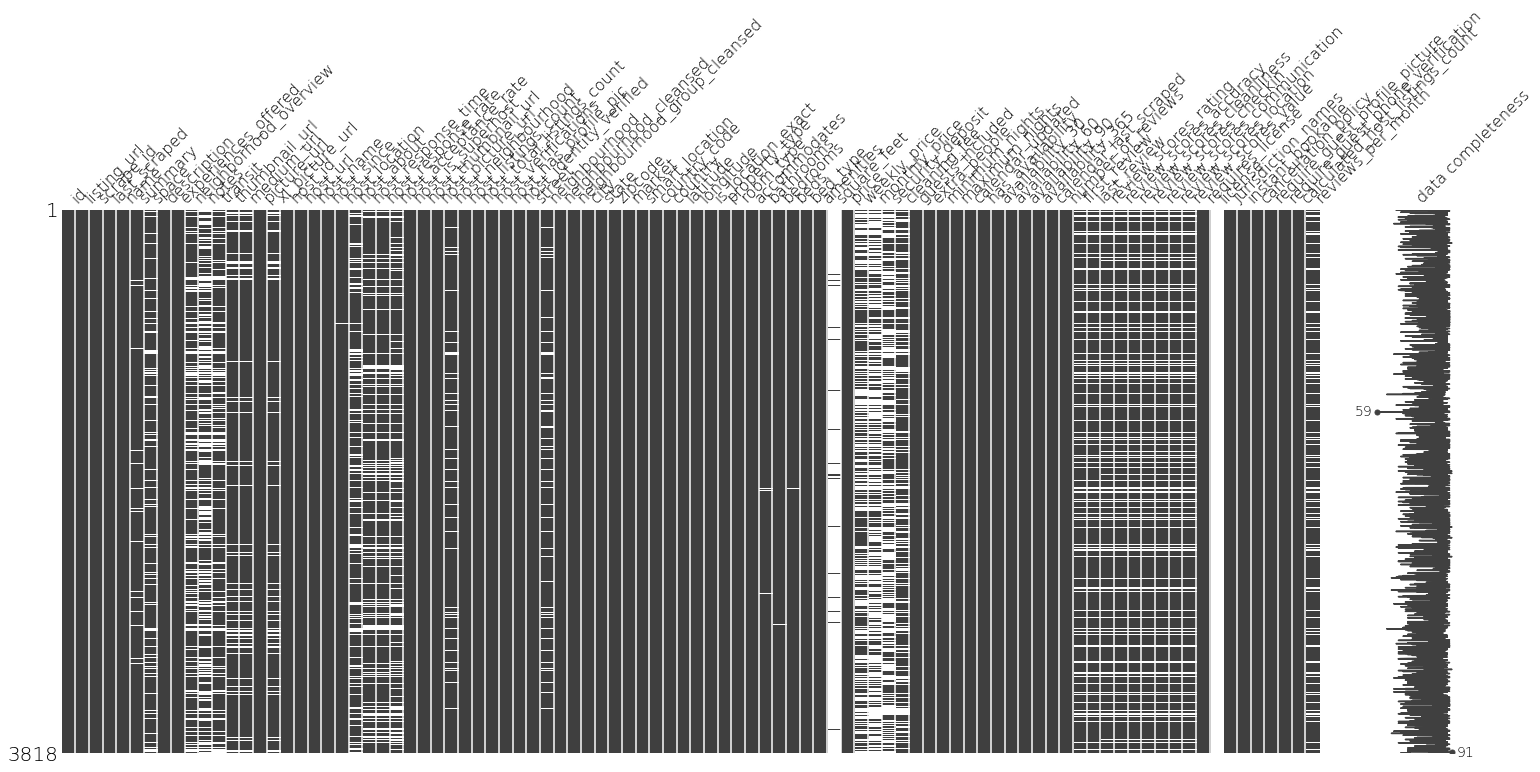

In [17]:
missingno.matrix(listings, labels=True);

This data describes each of the listings on AirBnB. There are a total of 91 columns and a lot of them have missing values at various places. 

The row with the minium missing values still has 59 values missing, and the row with the maximum values missing has 91 values missing. 

There are good reasons for listing data to have missing values since listings are of various types, also the owner might not have completed the many ways in which there is to describe the listing.

### Cleaning

In [24]:
def clean_listings(listings):
    listings_clean = listings.copy()
    
    listings_clean['host_response_rate'] = listings_clean['host_response_rate'].str.replace('%','').astype('int')
    listings_clean['host_acceptance_rate'] = listings_clean['host_acceptance_rate'].str.replace('%','').astype('int')
    

In [25]:
listings_clean = clean_listings(listings)

ValueError: cannot convert float NaN to integer

## Reviews

In [18]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


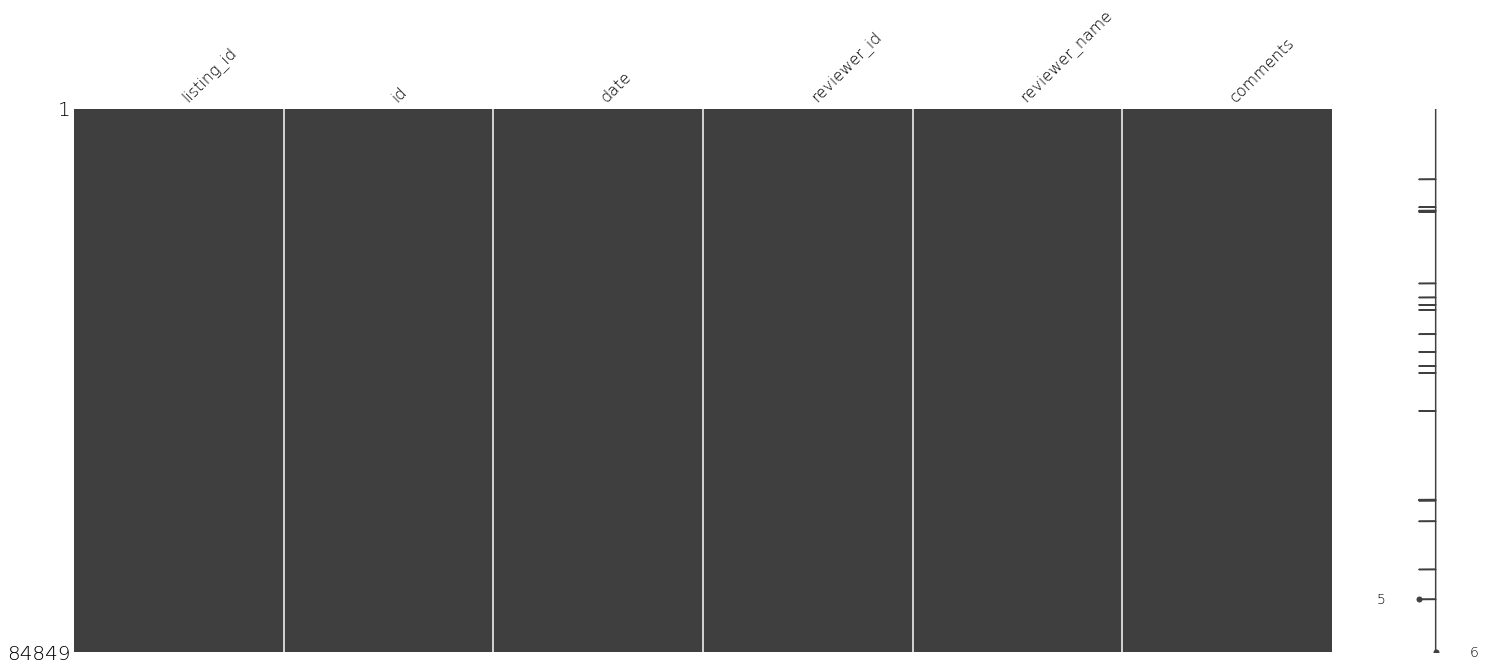

In [19]:
missingno.matrix(reviews)

This data shows the visitors reviews in text for a given listing, at a given date. Remarkably there are very few missing values.

# Analysis

## Yearly availability trend

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


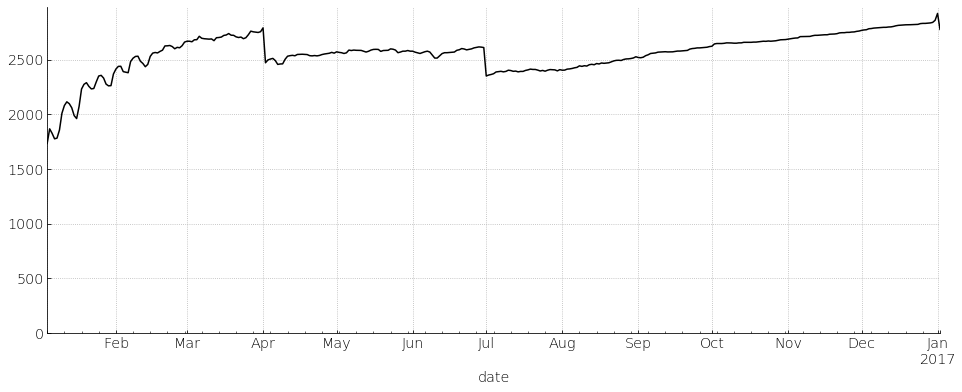

In [20]:
fig,ax = plt.subplots(figsize=(16,6))
calendar[calendar['available'] == 't'].groupby('date').size().plot(ax=ax, c='k')
ax.set_ylim(0,None);

The plot above shows the number of available listings for any given day of the year. Either there are some issues with the data or there are some very consistent trends. The sharp jumps at April and July signify that a lot of listings were either reserved or taken offline. 

## Yearly price trend

In [21]:
calendar_stats = calendar[calendar['available'] == 't'].groupby(['date']).agg({'cleaned_price':{'min','max','std','mean'}})
calendar_year = calendar_stats['2016-01-01':'2016-12-31']
calendar_month = calendar_stats.resample('M').mean()
calendar_month['month_names'] = calendar_month.index.strftime('%b')

Mean price: $137.66


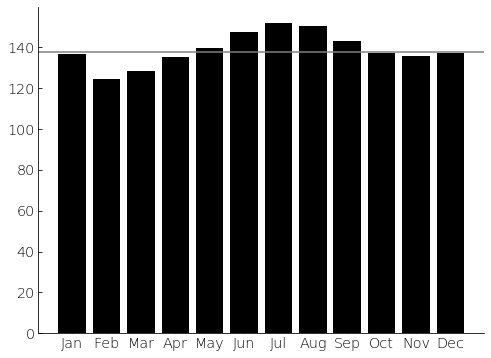

In [22]:
fig,ax = plt.subplots(figsize=(8,6))
ax.bar(calendar_month['month_names'], calendar_month['cleaned_price']['mean'], color='k')
price_mean = calendar_month['cleaned_price']['mean'].mean()
ax.axhline(calendar_month['cleaned_price']['mean'].mean(), c='gray')
print(f'Mean price: ${round(price_mean,2)}')
ax.grid(False)
ax.set_ylim(0,None);

From above the average price doesn't vary much over the year.

## Rental days

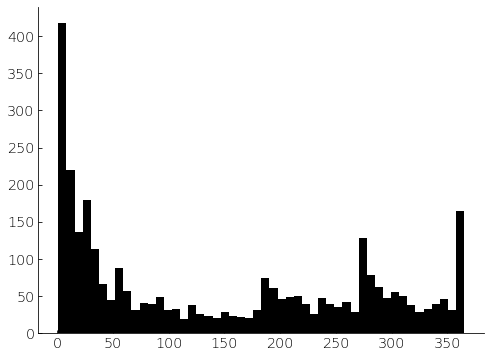

In [23]:
fig,ax = plt.subplots(figsize=(8,6))
rented_days = calendar[calendar['available'] == 'f'].groupby('listing_id').size().sort_values(ascending=False)
ax.hist(rented_days, bins=50, color='k')
ax.grid(False);